In [1]:
import sys
sys.path.append('../..')

import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'e'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1500])

In [5]:
time_window = 25 
time_step = 25
trial_bin_size = 15 
n_splits = 10
group_dict = OrderedDict([('Motion',[21,22]),('Color',[11,12])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [6]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [7]:
interp = eeg_decoder.Interpreter(clfr, subtitle='attended_feature') 
# interp.save_results()

Significant timepoints: [ 136  160  184  208  232  256  280  304  328  352  376  400  424  448
  472  496  520  544  568  592  616  640  664  688  712  736  760  784
  808  832  856  880  904  928  952  976 1000 1024 1048 1072 1096 1120
 1144 1168 1192 1216 1240 1264 1288 1312 1336 1360 1384 1408 1432 1456]
Saving output\figures\attended_featureacc.pdf
Saving output\figures\attended_featureacc.png


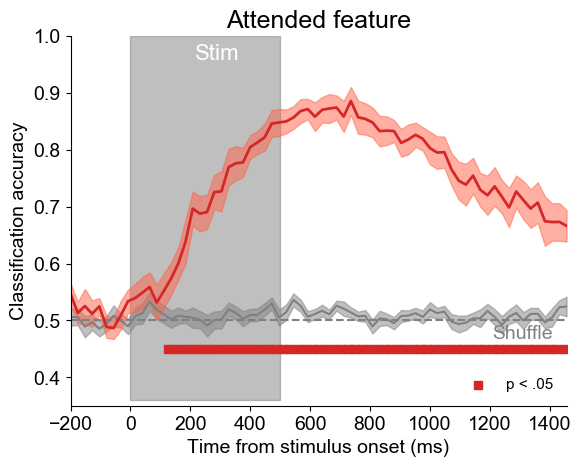

Mean delay accuracy: 0.7883444444444445
Mean delay S.D.: 0.06968298497525585


In [10]:
import matplotlib.pyplot as plt
interp.plot_acc(significance_testing=True,savefig=True,
                ylim=[0.35,1],chance_text_xy=[.85,.22],
                title='Attended feature',stim_time=[0,500])
plt.show()